In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
%matplotlib inline
mlp.rcParams['figure.dpi']=300

In [6]:
df_etf=pd.read_csv('ETF9data.csv',header=0,index_col=0)
df_etf.head()

,IDX,CQQQ,ASHX,AFTY,QLD,FTXN,PDBC,NANR,GLD
2018/1/1,0.056763,0.063510,0.059737,0.139384,0.178372,0.012970,0.031519,0.033728,0.032349
2018/2/1,-0.043048,-0.035676,-0.045771,-0.092722,-0.034255,-0.093458,-0.033333,-0.089099,-0.020760
2018/3/1,-0.055733,-0.037800,-0.054819,-0.023077,-0.086878,0.039691,0.021264,0.005990,0.006320
2018/4/1,-0.056914,-0.043798,-0.023882,-0.047807,0.002625,0.133862,0.037141,0.046740,-0.009540
2018/5/1,0.017434,0.034266,0.013107,-0.005021,0.112696,0.083078,0.022246,0.028157,-0.011959


In [7]:
df_etf.index = pd.to_datetime(df_etf.index, format="%Y/%m/%d").to_period('M')

In [8]:
df_etf.columns =df_etf.columns.str.strip()

In [9]:
pd.set_option("display.max_columns", None)

In [10]:
print("Shape of the DataFrame is: ",df_etf.shape)

Shape of the DataFrame is:  (61, 9)


In [11]:
df_etf.head()

,IDX,CQQQ,ASHX,AFTY,QLD,FTXN,PDBC,NANR,GLD
2018-01,0.056763,0.063510,0.059737,0.139384,0.178372,0.012970,0.031519,0.033728,0.032349
2018-02,-0.043048,-0.035676,-0.045771,-0.092722,-0.034255,-0.093458,-0.033333,-0.089099,-0.020760
2018-03,-0.055733,-0.037800,-0.054819,-0.023077,-0.086878,0.039691,0.021264,0.005990,0.006320
2018-04,-0.056914,-0.043798,-0.023882,-0.047807,0.002625,0.133862,0.037141,0.046740,-0.009540
2018-05,0.017434,0.034266,0.013107,-0.005021,0.112696,0.083078,0.022246,0.028157,-0.011959


In [12]:
def annualize_rets(r, periods_per_year):
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1

def annualize_vol(r, periods_per_year):
    return r.std()*(periods_per_year**0.5)

def sharpe_ratio(r, riskfree_rate, periods_per_year):
    rf_per_period = (1+riskfree_rate)**(1/periods_per_year)-1
    excess_ret = r - rf_per_period
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)
    ann_vol = annualize_vol(r, periods_per_year)
    return ann_ex_ret/ann_vol

In [13]:
er=annualize_rets(df_etf['2018':'2022'],12)
cov=df_etf['2018':'2022'].cov()

In [14]:
df_etf['2018':'2022']

,IDX,CQQQ,ASHX,AFTY,QLD,FTXN,PDBC,NANR,GLD
2018-01,0.056763,0.063510,0.059737,0.139384,0.178372,0.012970,0.031519,0.033728,0.032349
2018-02,-0.043048,-0.035676,-0.045771,-0.092722,-0.034255,-0.093458,-0.033333,-0.089099,-0.020760
2018-03,-0.055733,-0.037800,-0.054819,-0.023077,-0.086878,0.039691,0.021264,0.005990,0.006320
2018-04,-0.056914,-0.043798,-0.023882,-0.047807,0.002625,0.133862,0.037141,0.046740,-0.009540
2018-05,0.017434,0.034266,0.013107,-0.005021,0.112696,0.083078,0.022246,0.028157,-0.011959
2018-06,-0.084798,-0.059838,-0.092477,-0.094093,0.017057,-0.000807,-0.020170,0.007192,-0.036149
2018-07,0.030725,-0.034520,-0.017423,0.004522,0.050428,0.015758,-0.024919,-0.011535,-0.022419
2018-08,-0.012576,-0.080074,-0.059645,-0.041033,0.117815,-0.006205,0.008889,-0.064990,-0.021381
2018-09,-0.017925,-0.027328,0.034286,0.044490,-0.008274,0.002242,0.033590,0.019286,-0.006607
2018-10,-0.048991,-0.150676,-0.083978,-0.068321,-0.177493,-0.146965,-0.054875,-0.089504,0.021195


In [15]:
er

IDX    -0.069150
CQQQ   -0.064649
ASHX   -0.002421
AFTY   -0.020745
QLD     0.138331
FTXN    0.057655
PDBC   -0.032667
NANR    0.088640
GLD     0.065287
dtype: float64

In [16]:
def portfolio_return(weights, returns):
    return weights.T @ returns

def portfolio_vol(weights, covmat):
    return (weights.T @ covmat @ weights)**0.5

### two assets

In [17]:
def sim_ef2(n_points, er, cov):
    if er.shape[0] != 2:
        raise ValueError("plot_ef2 can only plot 2-asset frontiers")
    weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols
    })
    plt.figure()
    ef.plot.line(x="Volatility", y="Returns", style=".-", xlim=[min(vols)*0.9,max(vols)*1.1])
    

<Figure size 1800x1200 with 0 Axes>

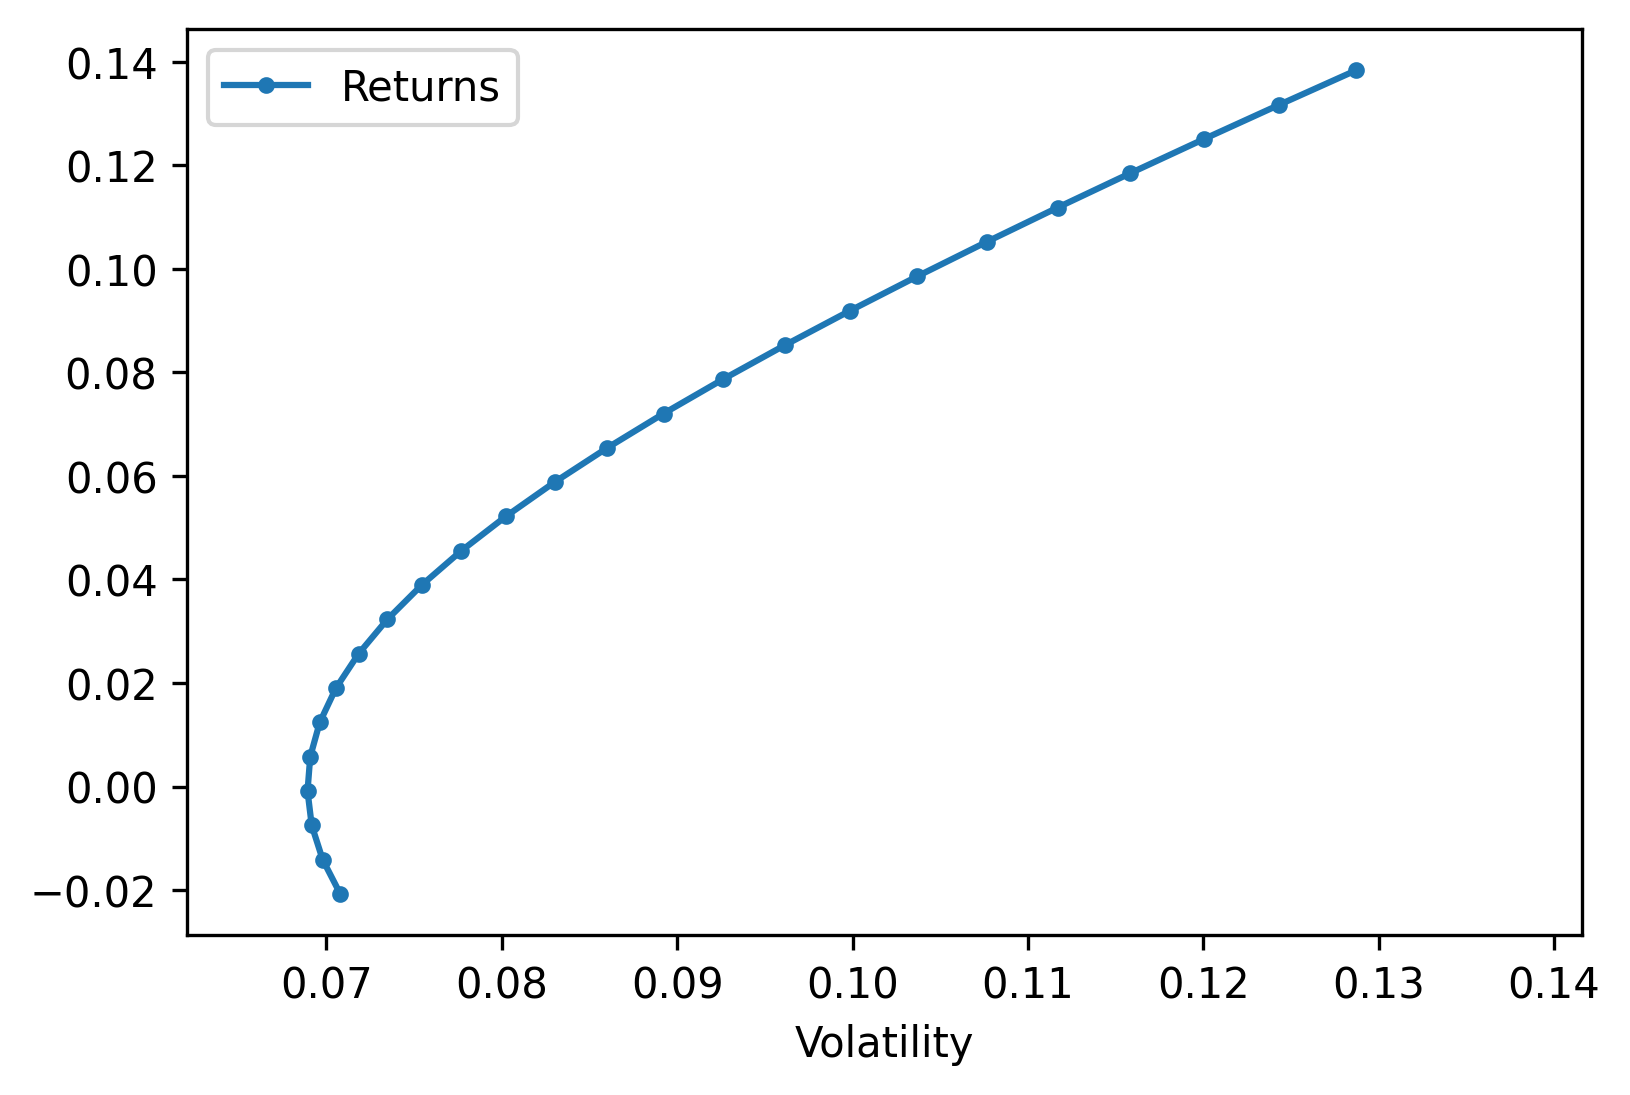

In [18]:
l = ["QLD", "AFTY"]
sim_ef2(25, er[l].values, cov.loc[l,l])

### three assets

In [28]:
def sim_efn(n_points, er, cov):
    """
    Simulates the n-asset portfolio returns and volatility (n>2)
    """
    n_assets = er.shape[0]
    weights = np.random.dirichlet(np.ones(n_assets,dtype=int), n_points)
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols
    })
    plt.figure()
    ef.plot.scatter(x="Volatility", y="Returns", xlim=[min(vols)*0.9,max(vols)*1.1], c='None', edgecolors='#87CEFA', facecolors='none', s=2, label=None)

/Users/miyuxin/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Figure size 1800x1200 with 0 Axes>

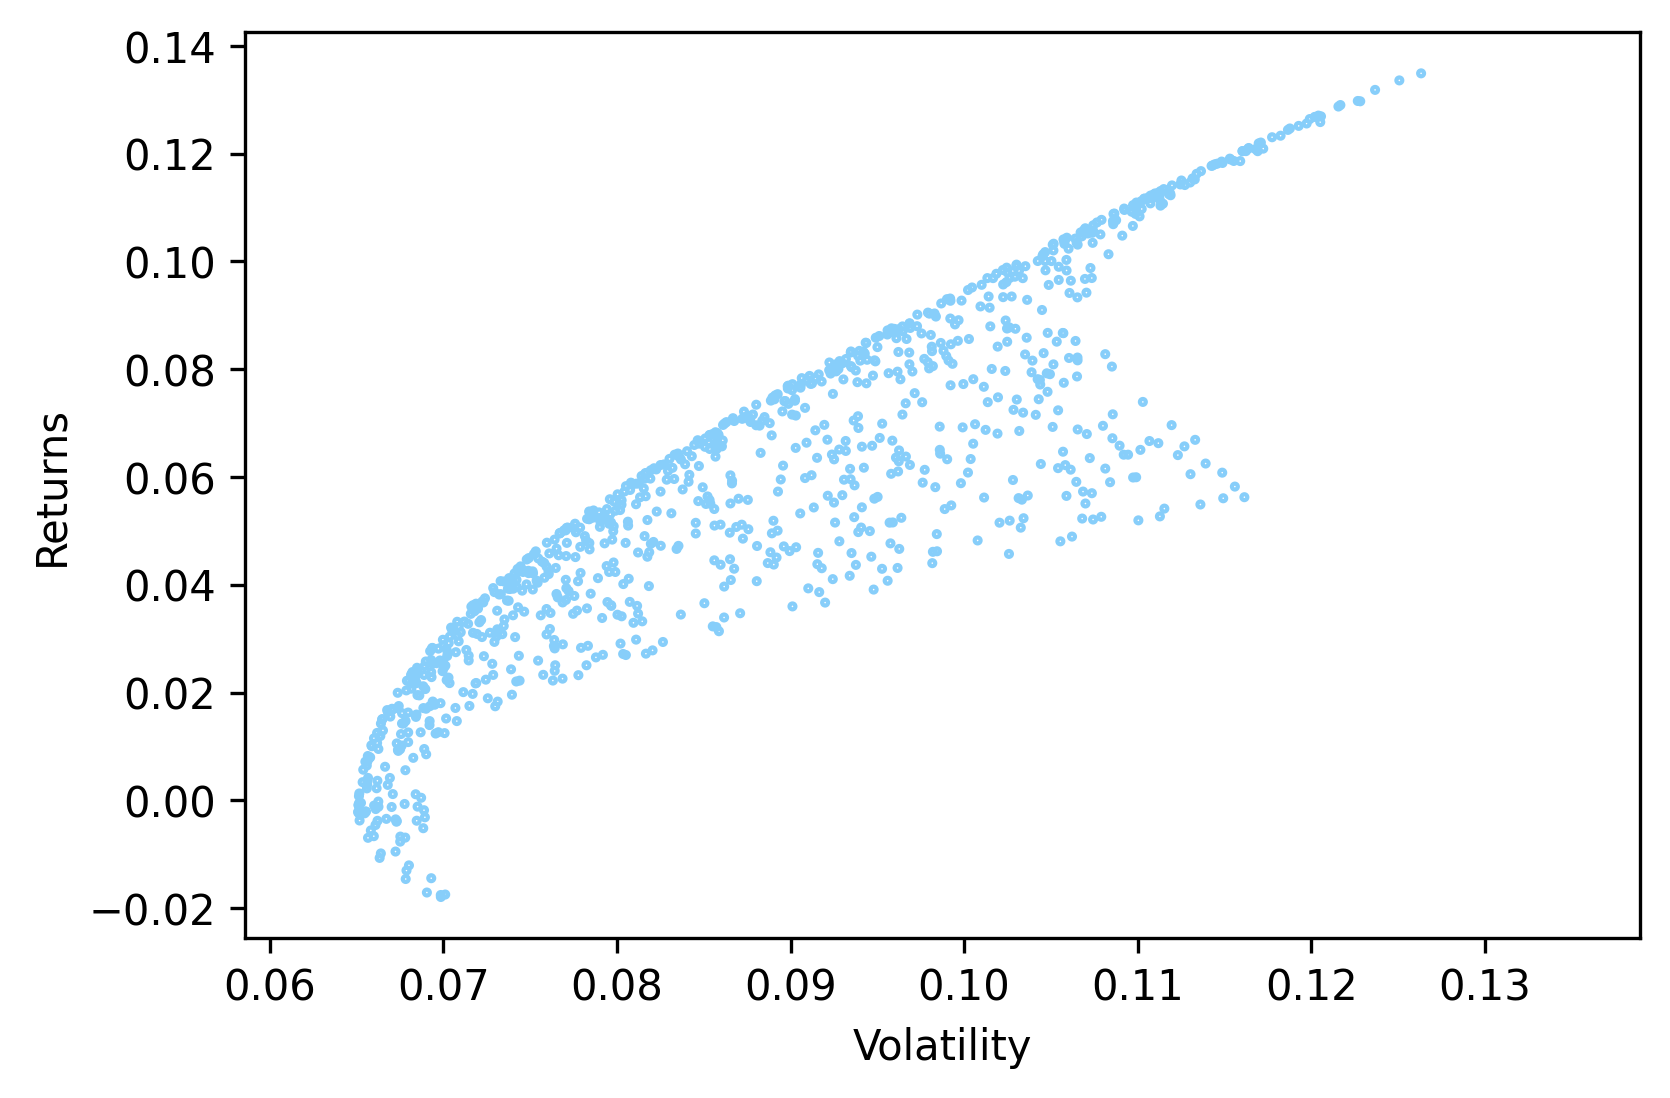

In [29]:
l = ["QLD","AFTY","FTXN"]
sim_efn(1000, er[l].values, cov.loc[l,l])

加上FTXN之后有效前沿基本没变

In [21]:
l = ["QLD","AFTY","GLD"]
sim_efn(1000, er[l].values, cov.loc[l,l])

NameError: name 'ax' is not defined

<Figure size 1800x1200 with 0 Axes>

加上GLD之后，相同Volatility下return增加

C:\Users\dell\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Figure size 1800x1200 with 0 Axes>

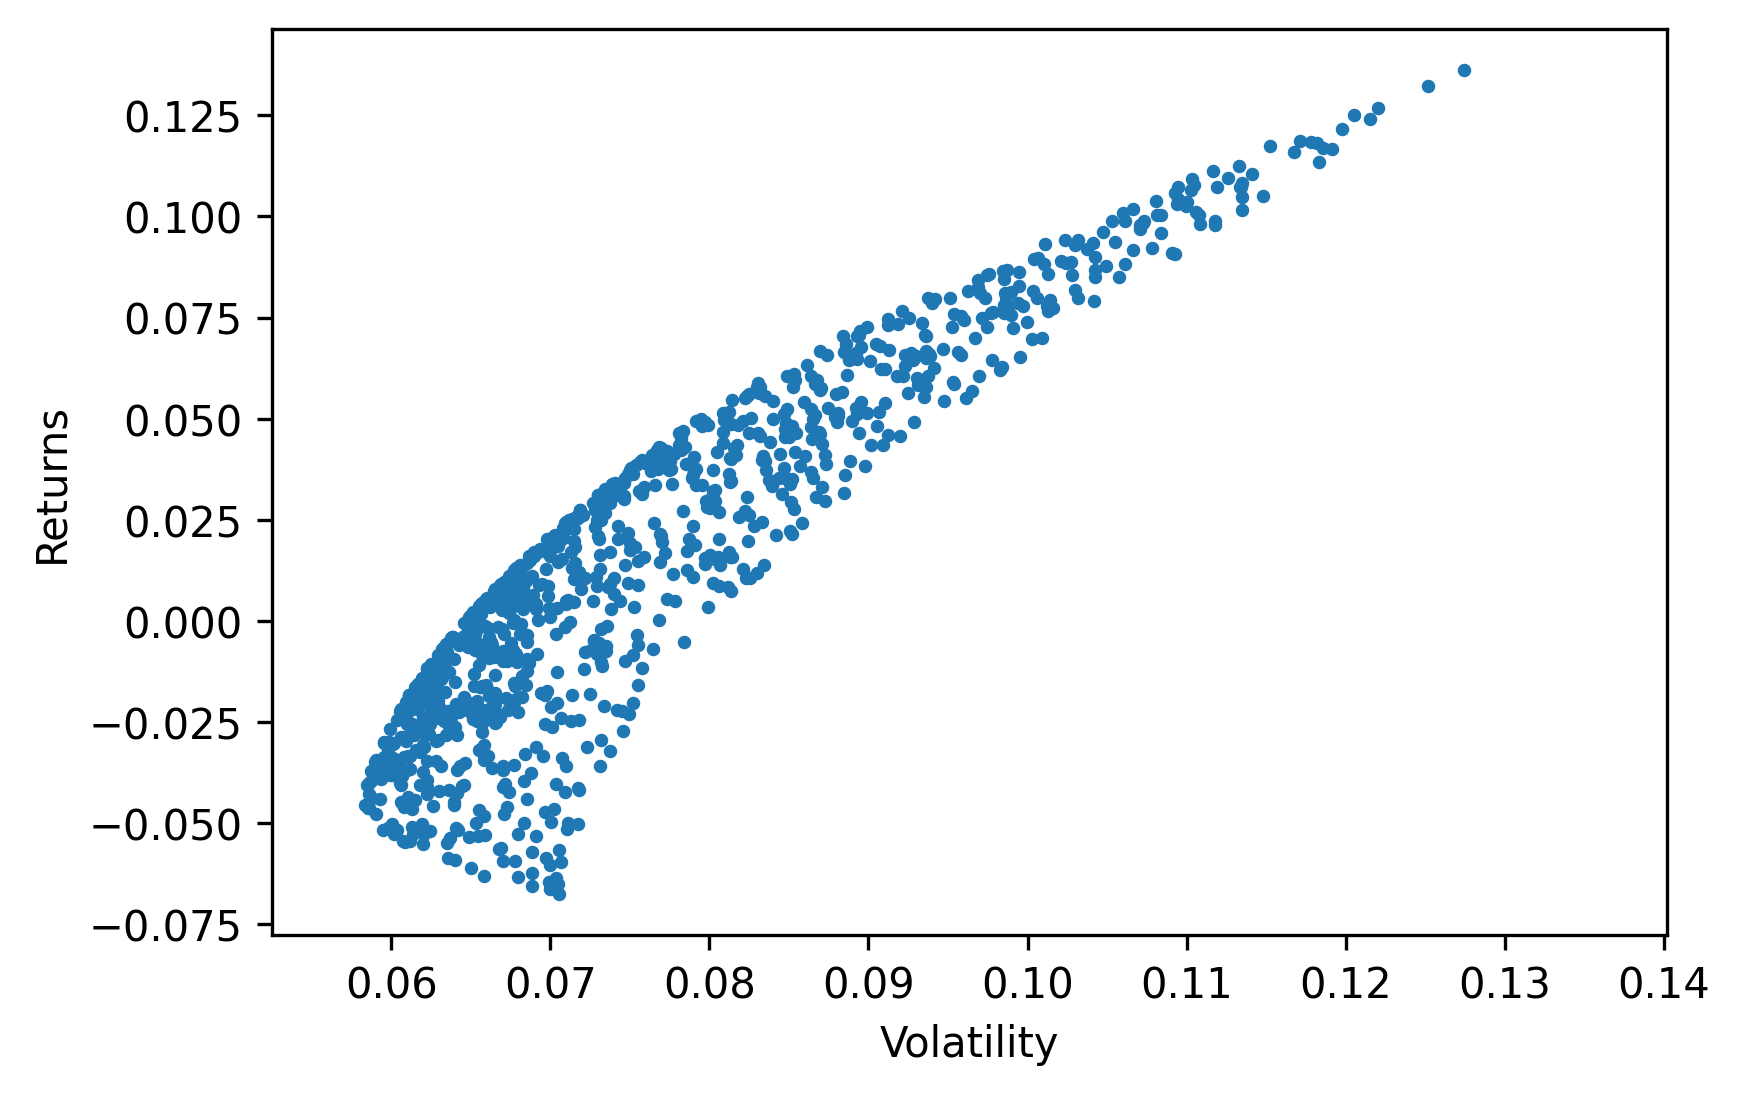

In [121]:
l = ["QLD","AFTY","IDX"]
sim_efn(1000, er[l].values, cov.loc[l,l])

加上IDX之后，相同Volatility下return减少

### 用sim_efn跑二资产

C:\Users\dell\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Figure size 1800x1200 with 0 Axes>

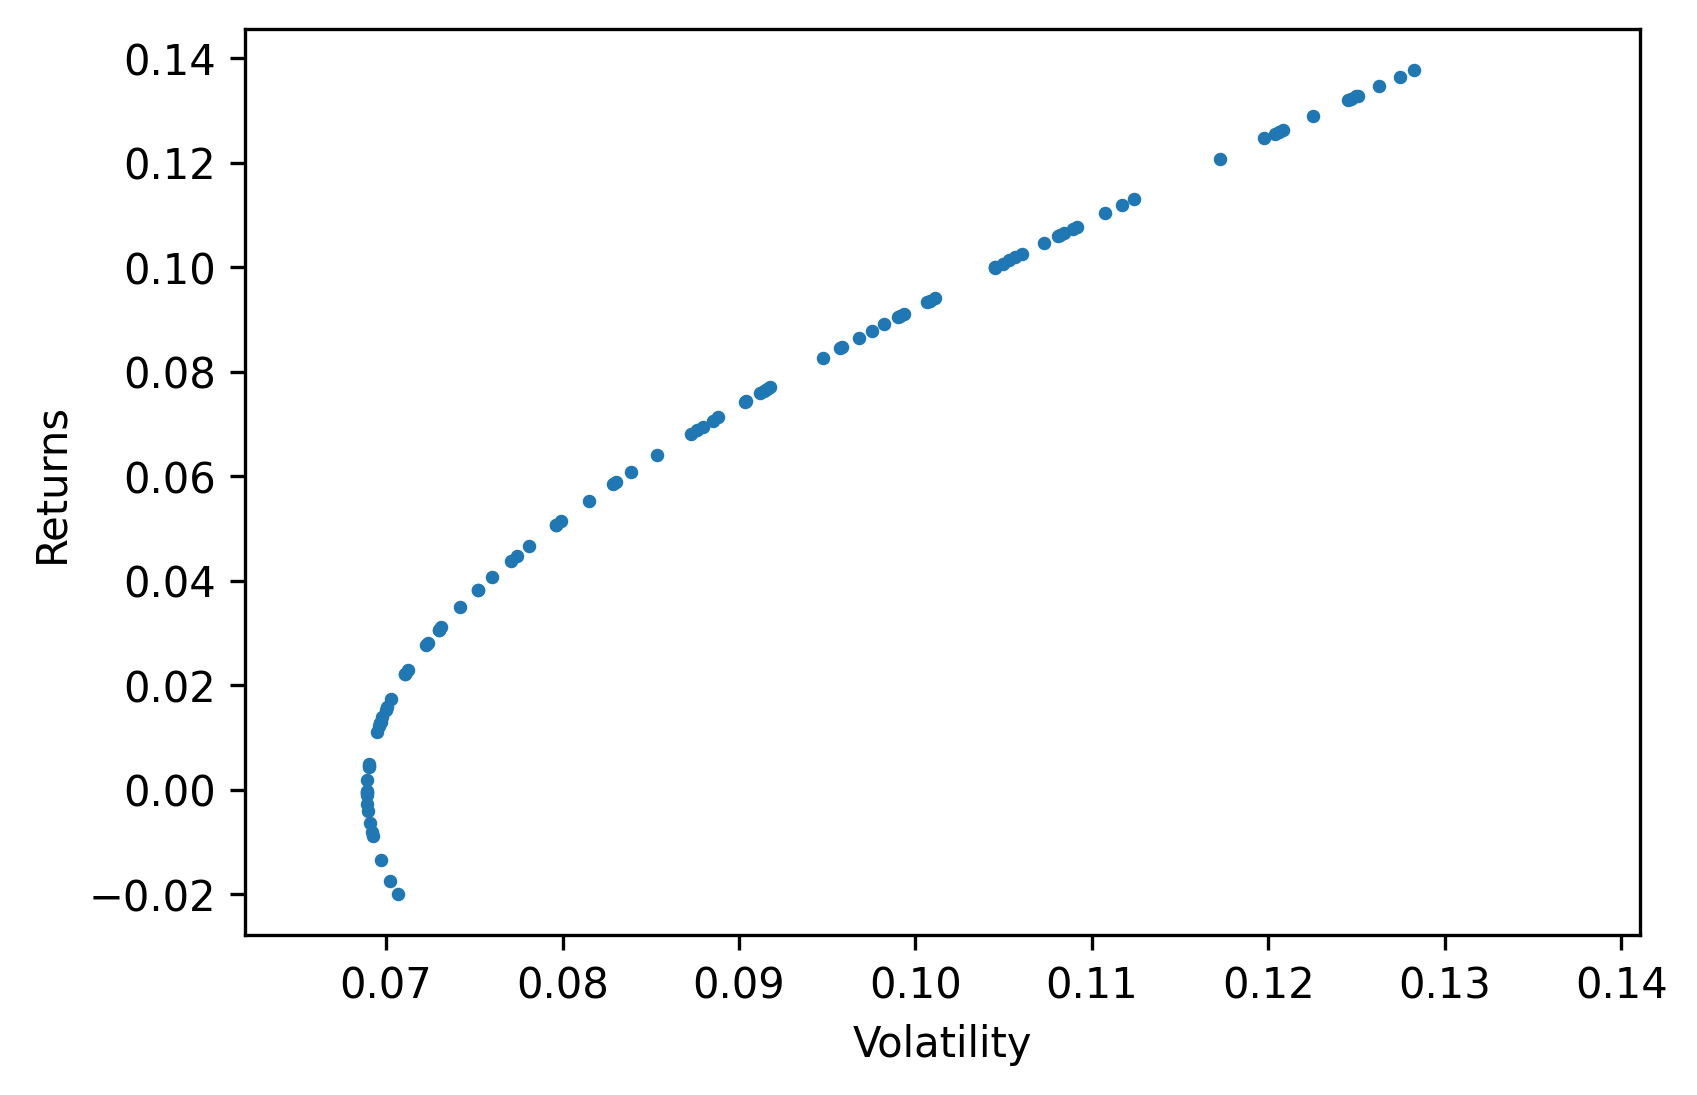

In [115]:
l = ["QLD", "AFTY"]
sim_efn(100, er[l].values, cov.loc[l,l])